In [25]:
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from typing import List

from simulator.PythonAPI.LaneKeepAssist.nadas.maps.towns.town10 import Town10

try:
    sys.path.append(glob.glob('../carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

In [26]:
try:
    client = carla.Client("localhost", 2000)
except Exception as e:
    print(e)
    exit(1)

In [27]:
world: carla.World = client.get_world()
carla_map: carla.Map = world.get_map()
carla_map.name

'Carla/Maps/Town10HD_Opt'

In [28]:
waypoints: List[carla.Waypoint] = carla_map.generate_waypoints(distance=1.0)
waypoint_routes = Town10().generate_route_waypoints(carla_map)
len(waypoint_routes)

28

In [52]:
import colorsys


def generate_rainbow_gradient(length, to_255=True):
    color_gradient = []
    for hue in np.linspace(0, 0.66, num=length, endpoint=True):
        (r, g, b) = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        if to_255:
            color_gradient.append((int(255 * r), int(255 * g), int(255 * b)))
        else:
            color_gradient.append((r, g, b))
    return color_gradient

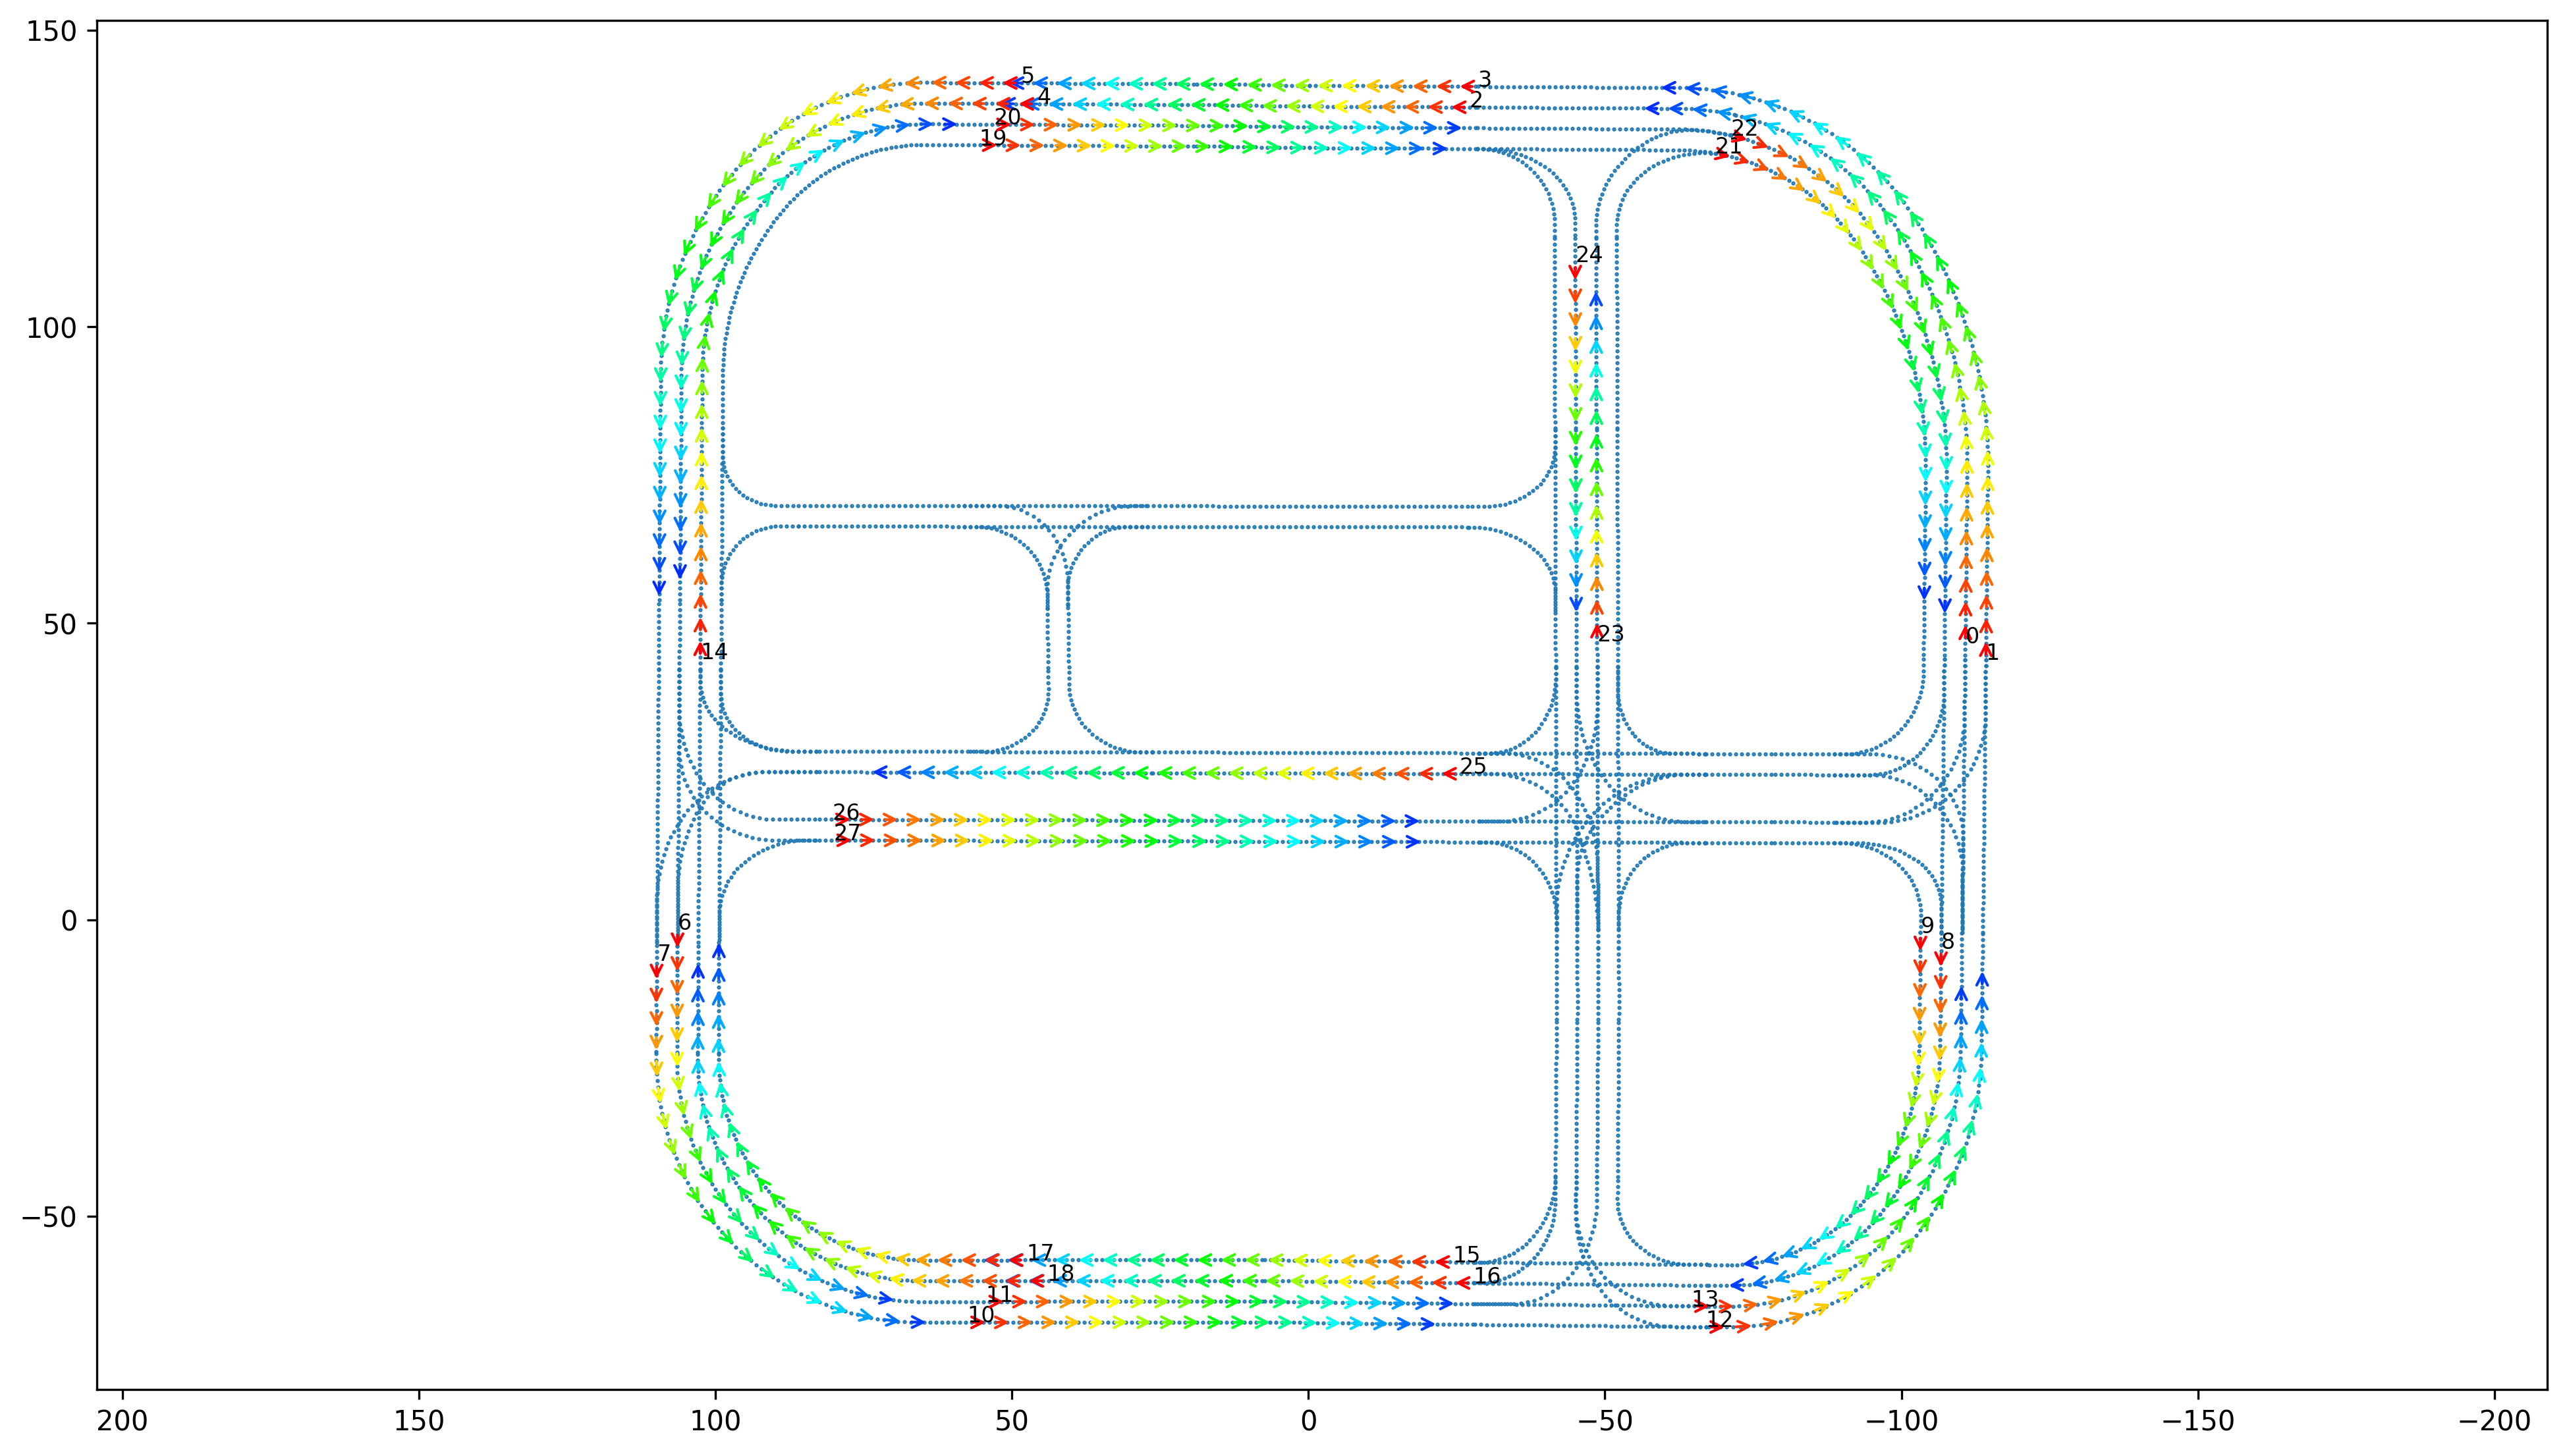

In [67]:
fig = plt.figure(figsize=(16, 9), dpi=300)
ax = fig.add_subplot(1, 1, 1)

x = [waypoint.transform.location.x for waypoint in waypoints]
y = [waypoint.transform.location.y for waypoint in waypoints]
ax.plot(x, y, ".", markersize=1)
ax.axis("equal")

for i, routes in enumerate(waypoint_routes):
    colors = generate_rainbow_gradient(len(routes), to_255=False)

    for j in range(len(routes) - 1):
        # Adding arrows for the route
        arrow_start = (routes[j][0].transform.location.x, routes[j][0].transform.location.y)
        arrow_end = (routes[j + 1][0].transform.location.x, routes[j + 1][0].transform.location.y)
        dx = arrow_end[0] - arrow_start[0]
        dy = arrow_end[1] - arrow_start[1]
        ax.annotate("", xy=arrow_end, xytext=arrow_start,
                    arrowprops=dict(arrowstyle="->", linewidth=1, color=colors[j]))
    ax.text(routes[0][0].transform.location.x, routes[0][0].transform.location.y, str(i), color="black", fontsize=8)

ax.invert_xaxis()  # Invert the y-axis

plt.axis("equal")
plt.show()